In [88]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

In [89]:
df = pd.read_csv("C:/Users/minkyu/Desktop/dacon accident prevention/모델 출력 분석용.csv")

In [90]:
# Embedding Vector 추출에 활용할 모델(jhgan/ko-sbert-sts) 불러오기
model = SentenceTransformer('jhgan/ko-sbert-sts', use_auth_token=False)

c:\Users\minkyu\AppData\Local\anaconda3\envs\sd2\lib\site-packages\sentence_transformers\SentenceTransformer.py:195: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v4 of SentenceTransformers.
  warnings.warn(


In [91]:
def score(sentence1,sentence2):
    # 코사인 유사도 함수
    def cosine_similarity(a, b):
        """코사인 유사도 계산"""
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        return dot_product / (norm_a * norm_b) if norm_a != 0 and norm_b != 0 else 0
    #자카드 유사도
    def jaccard_similarity(text1, text2):
        """자카드 유사도 계산"""
        set1, set2 = set(text1.split()), set(text2.split())  # 단어 집합 생성
        intersection = len(set1.intersection(set2))  # 교집합 크기
        union = len(set1.union(set2))  # 합집합 크기
        return intersection / union if union != 0 else 0

    # 두 문장 비교
    sentence1 = sentence1
    sentence2 = sentence2

    # 문장 임베딩 (NumPy 배열로 변환)
    embedding1 = model.encode(sentence1, convert_to_numpy=True)
    embedding2 = model.encode(sentence2, convert_to_numpy=True)

    # 코사인 유사도 계산
    similarity = cosine_similarity(embedding1, embedding2)
    jaccard = jaccard_similarity(sentence1, sentence2)

    print(f"코사인 유사도: {similarity:.4f}")
    print(f"자카드 유사도: {jaccard}")
    result = similarity*0.7 + jaccard*0.3
    print(f"최종 결과 : {result:4f}")

In [48]:
i =9
score(df["predicted_answer"][i],df['actual_answer'][i] )
print("사고원인	 : ",df['사고원인'][i])
print("인적사고 : ",df['인적사고'][i])
print("정답 : ",df['actual_answer'][i])
print("예측 : ",df["predicted_answer"][i])


코사인 유사도: 0.5979
자카드 유사도: 0.05714285714285714
최종 결과 : 0.435702
사고원인	 :  사다리 미끄럼 방지 조치 미흡 및 이동 중 부주의
인적사고 :  넘어짐(미끄러짐)
정답 :  사다리 전수 점검 및 논슬립 테이프 부착과 산업재해조사표 제출을 통한 재발 방지 대책.
예측 :  안전 교육 강화로 미끄럼 방지 조치와 주의사항 인지 제고, 현장 점검 강화로 즉시 개선 조치 취하고, 부주의 사고 예방을 위한 실시간 감독 체계 구축 예정.


In [92]:
# 코사인 유사도 함수
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b) if norm_a != 0 and norm_b != 0 else 0

# 자카드 유사도 함수
def jaccard_similarity(text1, text2):
    set1, set2 = set(text1.split()), set(text2.split())  # 단어 집합 생성
    intersection = len(set1.intersection(set2))  # 교집합 크기
    union = len(set1.union(set2))  # 합집합 크기
    return intersection / union if union != 0 else 0

# 점수 계산 함수
def calculate_scores(df):
    cosine_scores = []
    jaccard_scores = []
    
    for i in range(len(df)):
        sentence1 = df["predicted_answer"].iloc[i]
        sentence2 = df["actual_answer"].iloc[i]

        # 문장 임베딩
        embedding1 = model.encode(sentence1, convert_to_numpy=True)
        embedding2 = model.encode(sentence2, convert_to_numpy=True)

        # 유사도 계산
        cosine_sim = cosine_similarity(embedding1, embedding2)
        jaccard_sim = jaccard_similarity(sentence1, sentence2)

        # 리스트에 저장
        cosine_scores.append(cosine_sim)
        jaccard_scores.append(jaccard_sim)

    # 새로운 컬럼 추가
    df["cosine_similarity"] = cosine_scores
    df["jaccard_similarity"] = jaccard_scores

    # 전체 평균 계산
    avg_cosine = np.mean(cosine_scores)
    avg_jaccard = np.mean(jaccard_scores)
    
    print(f"전체 평균 코사인 유사도: {avg_cosine:.4f}")
    print(f"전체 평균 자카드 유사도: {avg_jaccard:.4f}")

    return df

# "인적사고"별 평균 유사도 계산 함수
def calculate_category_scores(df):
    category_means = df.groupby("인적사고")[["cosine_similarity", "jaccard_similarity"]].mean()
    print("\n📌 인적사고별 평균 유사도:")
    print(category_means)

# 데이터프레임에 유사도 추가
df = calculate_scores(df)

# "인적사고"별 평균 유사도 계산
calculate_category_scores(df)

전체 평균 코사인 유사도: 0.5842
전체 평균 자카드 유사도: 0.0679

📌 인적사고별 평균 유사도:
                       cosine_similarity  jaccard_similarity
인적사고                                                        
감전                              0.573399            0.051896
교통사고                            0.553332            0.056456
기타                              0.579825            0.070715
깔림                              0.580906            0.064042
끼임                              0.572172            0.067454
넘어짐(기타)                         0.570120            0.066658
넘어짐(물체에 걸림)                     0.584658            0.067377
넘어짐(미끄러짐)                       0.576944            0.063839
떨어짐(10미터 이상)                    0.563660            0.058461
떨어짐(2미터 미만)                     0.608362            0.073505
떨어짐(2미터 이상 ~ 3미터 미만)            0.592901            0.065122
떨어짐(3미터 이상 ~ 5미터 미만)            0.600043            0.064601
떨어짐(5미터 이상 ~ 10미터 미만)           0.587925            0.062556
떨어짐(분류불능)               

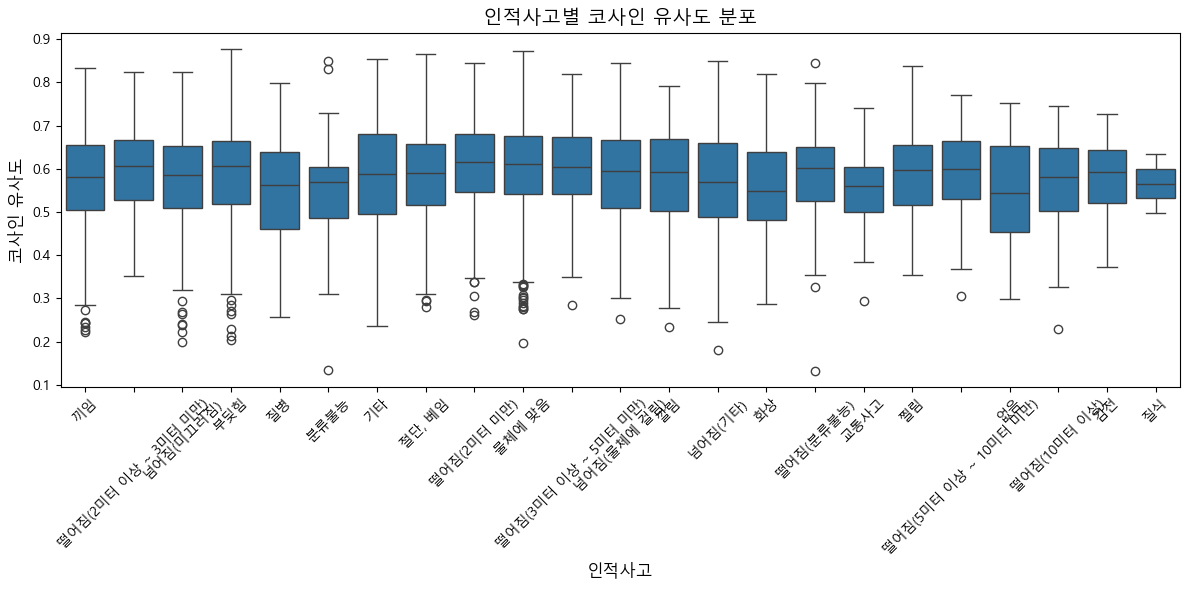

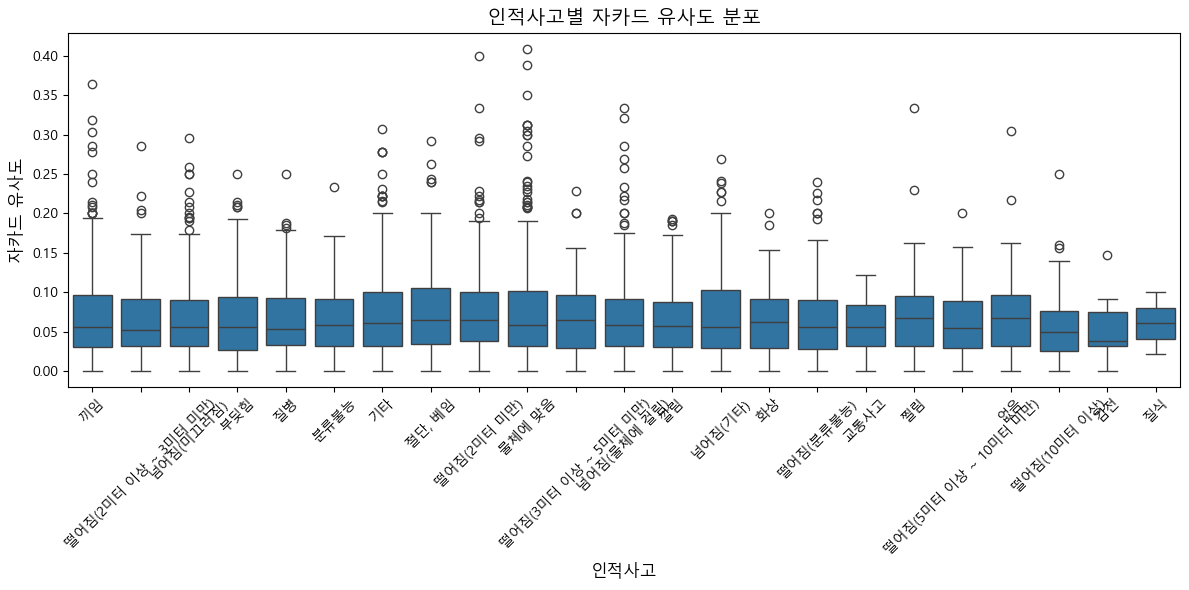

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # 윈도우의 경우, 'Malgun Gothic'을 사용할 수 있습니다.
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# "인적사고"별 평균 유사도 계산
category_means = df.groupby("인적사고")[["cosine_similarity", "jaccard_similarity"]].mean()

# Boxplot 그리기
plt.figure(figsize=(12, 6))

# 코사인 유사도 boxplot
sns.boxplot(x="인적사고", y="cosine_similarity", data=df)
plt.title("인적사고별 코사인 유사도 분포", fontsize=14)
plt.xlabel("인적사고", fontsize=12)
plt.ylabel("코사인 유사도", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 자카드 유사도 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="인적사고", y="jaccard_similarity", data=df)
plt.title("인적사고별 자카드 유사도 분포", fontsize=14)
plt.xlabel("인적사고", fontsize=12)
plt.ylabel("자카드 유사도", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [113]:
filtered_jaccard = df[df['jaccard_similarity'] >= 0.2]
filtered_cosine = df[df['cosine_similarity'] <= 0.3]
filtered_jaccard2 = df[df['jaccard_similarity'] <= 0.05]
filtered_cosine2 = df[df['cosine_similarity'] >= 0.55]

In [117]:
print("자카드 유사도 0.2 이상일때 문자열 길이",filtered_jaccard['predicted_answer'].apply(len).mean())
print("자카드 유사도 0.05 이하일때 문자열 길이",filtered_jaccard2['predicted_answer'].apply(len).mean())

자카드 유사도 0.2 이상일때 문자열 길이 53.631147540983605
자카드 유사도 0.05 이하일때 문자열 길이 69.36829386176898


In [118]:
print("코사인 유사도 0.55 이상일때 문자열 길이",filtered_cosine['predicted_answer'].apply(len).mean())
print("코사인 유사도 0.3 이하일때 문자열 길이",filtered_cosine2['predicted_answer'].apply(len).mean())

코사인 유사도 0.55 이상일때 문자열 길이 56.04615384615385
코사인 유사도 0.3 이하일때 문자열 길이 70.86708650977792


In [119]:
df2 = pd.read_csv("C:/Users/minkyu/Desktop/dacon accident prevention/모델 출력 분석용2.csv")
df2= calculate_scores(df)

전체 평균 코사인 유사도: 0.5842
전체 평균 자카드 유사도: 0.0679


In [140]:
df['actual_answer'].apply(len).mean()

60.39871931696905

In [143]:
train['재발방지대책 및 향후조치계획']

0                            고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
1                                    재발 방지 대책 마련과 안전교육 실시.
2        현장자재 정리와 안전관리 철저를 통한 재발 방지 대책 및 공문 발송을 통한 향후 조...
3        위험성 평가 및 교육을 통해 작업장 내 위험요인과 안전수칙을 근로자에게 전파하고, ...
4        자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...
                               ...                        
23417                               현장안전관리와 일용근로자 교육의 철저함.
23418    근로자 안전교육 실시 및 관리감독 강화를 통한 사고 방지 대책과 안전교육 강화를 포...
23419    작업자 안전수칙 교육 철저와 재해 사례 전파 및 안전교육 실시, 안전수칙 준수 철저...
23420     해당작업에 맞는 개인보호구 지급 및 점검관리, 공사참여자 안전관리교육, 시공관리 실시.
23421    작업전 교육과 작업시 안전관리를 철저히 시행하여 준공완료를 목표로 하는 재발 방지 대책.
Name: 재발방지대책 및 향후조치계획, Length: 23422, dtype: object

In [144]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("LGAI-EXAONE/EXAONE-3.5-32B-Instruct")

In [147]:
# 각 문장에 대한 토큰 수 계산
train['token_count'] = train['재발방지대책 및 향후조치계획'].apply(lambda x: len(tokenizer.encode(x)))

In [155]:

# 각 문장에 대한 토큰 수 계산
df['token_count'] = df['predicted_answer'].apply(lambda x: len(tokenizer.encode(x)))

In [158]:
df['token_count'].mean()

28.824759871931697

In [160]:
df['token_count'].median()

26.0

In [159]:
train['token_count'].mean()

26.722568525318078

In [161]:
train['token_count'].median()

23.0

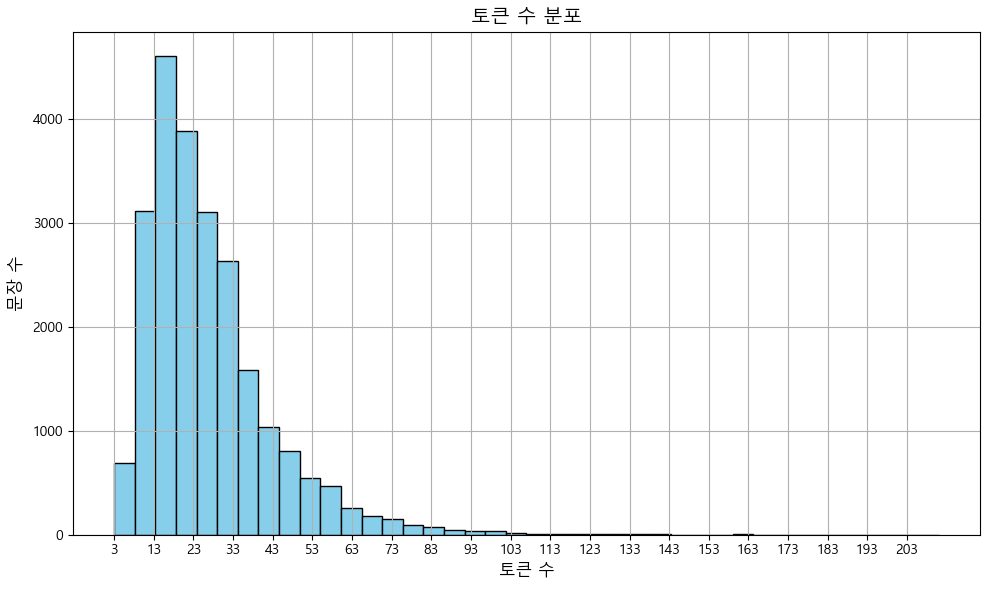

In [152]:
# 시각화
plt.figure(figsize=(10, 6))
plt.hist(train['token_count'], bins=40, color='skyblue', edgecolor='black')
plt.title('토큰 수 분포', fontsize=14)
plt.xlabel('토큰 수', fontsize=12)
plt.ylabel('문장 수', fontsize=12)
plt.xticks(range(min(train['token_count']), max(train['token_count'])+1, 10))
plt.grid(True)
plt.tight_layout()
plt.show()

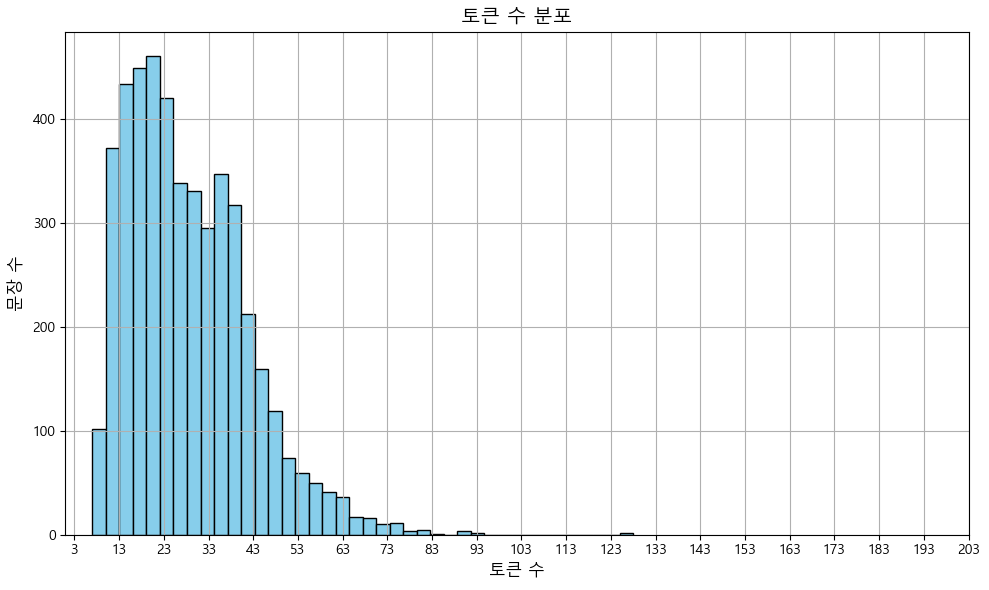

In [157]:
# 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['token_count'], bins=40, color='skyblue', edgecolor='black')
plt.title('토큰 수 분포', fontsize=14)
plt.xlabel('토큰 수', fontsize=12)
plt.ylabel('문장 수', fontsize=12)
plt.xticks(range(min(train['token_count']), max(train['token_count'])+1, 10))
plt.grid(True)
plt.tight_layout()
plt.show()